In [1]:
# import Library
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


# Membaca data
df = pd.read_csv('rumah123_yogya.csv')

# Menampilkan hasil
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [3]:
# Hilangkan "m²" dari kolom surface_area dan building_area
df["surface_area"] = df["surface_area"].str.replace("m²", "").str.strip()
df["building_area"] = df["building_area"].str.replace("m²", "").str.strip()

# Konversi ke format numerik
df["surface_area"] = pd.to_numeric(df["surface_area"], errors="coerce")
df["building_area"] = pd.to_numeric(df["building_area"], errors="coerce")

# Menampilkan kolom yang sudah diubah
print(df[["surface_area", "building_area"]])

      surface_area  building_area
0            120.0          110.0
1            102.0          126.0
2            100.0          100.0
3            109.0           67.0
4             60.0           30.0
...            ...            ...
2015         104.0           80.0
2016          89.0           60.0
2017         140.0           60.0
2018         118.0          160.0
2019         200.0          180.0

[2020 rows x 2 columns]


In [4]:
df.isnull().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64

In [5]:
# Mengisi Median untuk bed dan bath
df["bed"] = df["bed"].fillna(df["bed"].mean())
df["bath"] = df["bath"].fillna(df["bath"].mean())

# Mengisi Nilai Default Untuk carport
df['carport'] = df['carport'].fillna(0)

# Ganti nilai NaN di kolom 'surface_area' dengan rata-rata
df["surface_area"] = df["surface_area"].fillna(df["surface_area"].mean())

# Ganti nilai NaN di kolom 'building_area' dengan rata-rata
df["building_area"] = df["building_area"].fillna(df["building_area"].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2020 non-null   float64
 5   bath              2020 non-null   float64
 6   carport           2020 non-null   float64
 7   surface_area      2020 non-null   float64
 8   building_area     2020 non-null   float64
dtypes: float64(5), object(4)
memory usage: 142.2+ KB


In [6]:
df.isnull().sum()

price               0
nav-link            0
description         0
listing-location    0
bed                 0
bath                0
carport             0
surface_area        0
building_area       0
dtype: int64

In [7]:
# Menghapus kolom 'nav-link', 'description'
df = df.drop(columns=['nav-link', 'description'])
df.head()

,price,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar","Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0
1,Rp 170 Juta,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0
2,Rp 695 Juta,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0
3,Rp 560 Juta,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0
4,Rp 200 Juta,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0


In [14]:
# Fungsi untuk membersihkan dan mengonversi harga dengan penghapusan koma sebelum pengalian
def convert_price_final(price):
    if isinstance(price, str):  # Periksa apakah nilai adalah string
        price = price.replace("Rp", "").replace(".", "").strip()  # Hilangkan "Rp" dan titik
        if "Juta" in price:  # Konversi untuk harga dalam Juta
            price = float(price.replace("Juta", "").replace(",", "")) * 1_000_000  # Hapus koma, lalu kalikan
        elif "Miliar" in price:  # Konversi untuk harga dalam Miliar
            numeric_value = float(price.replace("Miliar", "").replace(",", ""))  # Hapus koma
            if "," in price:  # Jika ada desimal
                decimal_places = len(price.split(",")[1])  # Hitung jumlah angka di belakang koma
                if decimal_places == 1:  # Jika 1 angka desimal
                    price = numeric_value * 100_000_000
                elif decimal_places == 2:  # Jika 2 angka desimal
                    price = numeric_value * 10_000_000
                else:  # Jika lebih dari 2 angka desimal
                    price = numeric_value * 1_000_000_000
            else:  # Jika tidak ada desimal
                price = numeric_value * 1_000_000_000
        else:  # Format tidak sesuai
            price = None
    return price


# Terapkan fungsi ke seluruh kolom `price`
df["price_numeric"] = df["price"].apply(convert_price)

# Tampilkan beberapa baris hasil untuk memastikan
df[["price", "price_numeric"]].head()



,price,price_numeric
0,"Rp 1,79 Miliar",1.790000e+09
1,Rp 170 Juta,1.700000e+08
2,Rp 695 Juta,6.950000e+08
3,Rp 560 Juta,5.600000e+08
4,Rp 200 Juta,2.000000e+08


In [ ]:
df.head()

,price,listing-location,bed,bath,carport,surface_area,building_area,price_numeric
0,"Rp 1,79 Miliar","Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0,"1,790,000,000.00"
1,Rp 170 Juta,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0,"170,000,000.00"
2,Rp 695 Juta,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0,"695,000,000.00"
3,Rp 560 Juta,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0,"560,000,000.00"
4,Rp 200 Juta,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0,"200,000,000.00"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   listing-location  2020 non-null   object 
 2   bed               2020 non-null   float64
 3   bath              2020 non-null   float64
 4   carport           2020 non-null   float64
 5   surface_area      2020 non-null   float64
 6   building_area     2020 non-null   float64
 7   price_numeric     2020 non-null   object 
dtypes: float64(5), object(3)
memory usage: 126.4+ KB


In [24]:
# Konversi tipe data ke integer
df["bed"] = df["bed"].astype(int)
df["bath"] = df["bath"].astype(int)
df["carport"] = df["carport"].astype(int)
df["surface_area"] = df["surface_area"].astype(int)
df["building_area"] = df["building_area"].astype(int)
# Pastikan kolom 'price_numeric' bersih dari pemisah ribuan (koma) dan desimal
df["price_numeric"] = df["price_numeric"].str.replace(",", "").str.replace(".00", "")

# Ubah kolom 'price_numeric' menjadi tipe data integer
df["price_numeric"] = df["price_numeric"].astype(int)

# Periksa kembali tipe data untuk memastikan
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             2020 non-null   object
 1   listing-location  2020 non-null   object
 2   bed               2020 non-null   int64 
 3   bath              2020 non-null   int64 
 4   carport           2020 non-null   int64 
 5   surface_area      2020 non-null   int64 
 6   building_area     2020 non-null   int64 
 7   price_numeric     2020 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 126.4+ KB


In [25]:
df.head()

,price,listing-location,bed,bath,carport,surface_area,building_area,price_numeric
0,"Rp 1,79 Miliar","Ngaglik, Sleman",3,3,2,120,110,1790000000
1,Rp 170 Juta,"Jombor, Sleman",3,2,1,102,126,170000000
2,Rp 695 Juta,"Berbah, Sleman",2,2,1,100,100,695000000
3,Rp 560 Juta,"Prambanan, Sleman",3,1,1,109,67,560000000
4,Rp 200 Juta,"Moyudan, Sleman",2,1,1,60,30,200000000


In [26]:
# Daftar lokasi yang ingin disaring
desired_locations = [
    "Berbah, Sleman",
    "Depok, Sleman",
    "Gamping, Sleman",
    "Godean, Sleman",
    "Kalasan, Sleman",
    "Minggir, Sleman",
    "Mlati, Sleman",
    "Moyudan, Sleman",
    "Ngaglik, Sleman",
    "Ngemplak, Sleman",
    "Pakem, Sleman",
    "Prambanan, Sleman",
    "Sayegan, Sleman",
    "Sleman, Sleman",
    "Tempel, Sleman",
    "Turi, Sleman"
]

# Filter DataFrame
df_filtered = df[df['listing-location'].isin(desired_locations)]

# Cek hasil
print(df_filtered[['listing-location']].value_counts())

# Periksa jumlah data setelah filter
print(f"Jumlah data setelah filter: {df_filtered.shape[0]}")

# Simpan kembali ke DataFrame utama jika ingin melanjutkan dengan data ini
df = df_filtered


listing-location 
Ngaglik, Sleman      303
Depok, Sleman        197
Kalasan, Sleman      144
Mlati, Sleman        122
Sleman, Sleman       116
Ngemplak, Sleman      99
Gamping, Sleman       87
Godean, Sleman        42
Berbah, Sleman        26
Prambanan, Sleman     24
Sayegan, Sleman       14
Pakem, Sleman         10
Turi, Sleman           6
Moyudan, Sleman        5
Tempel, Sleman         5
Minggir, Sleman        2
Name: count, dtype: int64
Jumlah data setelah filter: 1202


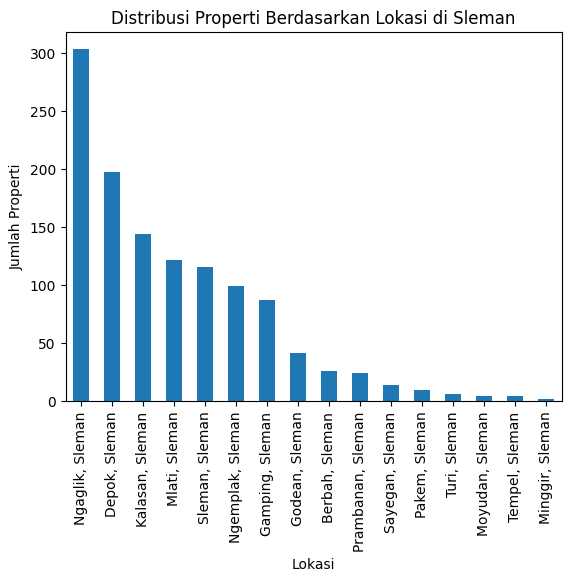

In [27]:
import matplotlib.pyplot as plt

df_filtered['listing-location'].value_counts().plot(kind='bar')
plt.title('Distribusi Properti Berdasarkan Lokasi di Sleman')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Properti')
plt.show()


In [28]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Encode kolom lokasi
df['location_encoded'] = encoder.fit_transform(df['listing-location'])

# Lihat hasil encoding
print(df[['listing-location', 'location_encoded']])


       listing-location  location_encoded
0       Ngaglik, Sleman                 8
2        Berbah, Sleman                 0
3     Prambanan, Sleman                11
4       Moyudan, Sleman                 7
5         Depok, Sleman                 1
...                 ...               ...
2012      Depok, Sleman                 1
2015    Kalasan, Sleman                 4
2016    Gamping, Sleman                 2
2017    Ngaglik, Sleman                 8
2018      Depok, Sleman                 1

[1202 rows x 2 columns]


In [29]:
#Pisahkan Fitur dan Target
features = ['bed', 'bath', 'carport', 'surface_area', 'building_area', 
             'location_encoded']

#Fitur (X)
X = df[features]
#Target (y)
y = df['price_numeric']
df.head()

,price,listing-location,bed,bath,carport,surface_area,building_area,price_numeric,location_encoded
0,"Rp 1,79 Miliar","Ngaglik, Sleman",3,3,2,120,110,1790000000,8
2,Rp 695 Juta,"Berbah, Sleman",2,2,1,100,100,695000000,0
3,Rp 560 Juta,"Prambanan, Sleman",3,1,1,109,67,560000000,11
4,Rp 200 Juta,"Moyudan, Sleman",2,1,1,60,30,200000000,7
5,"Rp 1,47 Miliar","Depok, Sleman",5,3,1,125,157,1470000000,1


In [30]:
from sklearn.model_selection import train_test_split
#20% dari data digunakan untuk testing, 80% untuk training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)
y_test.shape

(241,)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Asumsi: X_train, X_test, y_train, y_test sudah ada sebelumnya

# Inisialisasi model
rf = RandomForestRegressor(random_state=60)
rf.fit(X_train, y_train)

# Prediksi
y_pred = rf.predict(X_test)

# Evaluasi
print("MAE:", mean_absolute_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manual RMSE
print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))
score = rf.score(X_train, y_train)
print('Akurasi model Random Forest Reggression = ', score)


MAE: 345096103.7380836
RMSE: 723431962.2053382
R2 Score: 0.7308309816300649
Akurasi model Random Forest Reggression =  0.9589117097664281


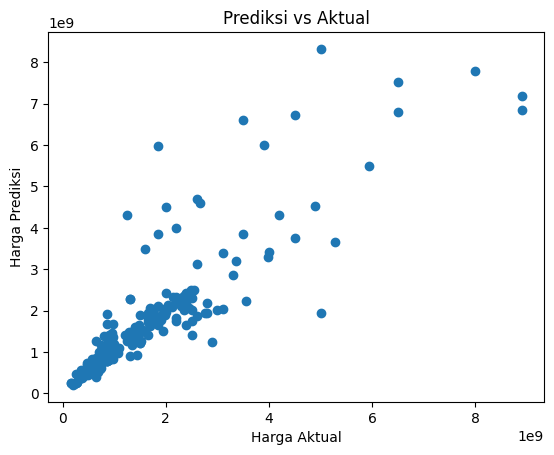

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.title("Prediksi vs Aktual")
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.show()

In [33]:
import numpy as np

# Contoh input data properti baru
input_data = {
    'bed': 3,
    'bath': 2,
    'carport': 1,
    'surface_area': 120,
    'building_area': 90,
    'location_encoded': 8  # Rata-rata harga lokasi tertentu
}

# Convert ke format array
features = np.array([[input_data['bed'], input_data['bath'], input_data['carport'],
                      input_data['surface_area'], input_data['building_area'],
                      input_data['location_encoded']]])

# Prediksi harga menggunakan model Random Forest
predicted_price = rf.predict(features)

# Tampilkan hasil prediksi
print(f"Prediksi Harga Properti: Rp {predicted_price[0]:,.0f}")


Prediksi Harga Properti: Rp 1,200,620,000


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [34]:
import pickle

filename = 'estimasi_rumah.sav'
pickle.dump(rf,open(filename,'wb'))